In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
import matplotlib.pyplot as plt
import math
from collections import defaultdict
import operator
import scipy as sp

In [17]:
def distance(origin, other):
    return np.sum((origin - other) ** 2)**(1/2)

def read_data(path, header = None, seperator = ' '):
    return pd.read_csv(path, header = header, sep = seperator).iloc[:,:].values

In [18]:
data_location_AT = [r"D:\Storage\Research\data\ATER",
                 r"D:\Storage\Research\data\ATERDD",
                 r"D:\Storage\Research\data\ATGEO",
                 r"D:\Storage\Research\data\ATGEOGD",
                 r"D:\Storage\Research\data\ATHGG",
                 r"D:\Storage\Research\data\ATSF",
                 r"D:\Storage\Research\data\ATSFDD",
                 r"D:\Storage\Research\data\ATSticky",
                 r"D:\Storage\Research\data\ATOriginal"]

In [19]:
data_location_CE = [r"D:\Storage\Research\data\CEER",
                 r"D:\Storage\Research\data\CEERDD",
                 r"D:\Storage\Research\data\CEGEO",
                 r"D:\Storage\Research\data\CEGEOGD",
                 r"D:\Storage\Research\data\CEHGG",
                 r"D:\Storage\Research\data\CESF",
                 r"D:\Storage\Research\data\CESFDD",
                 r"D:\Storage\Research\data\CESticky",
                 r"D:\Storage\Research\data\CEOriginal"]

In [20]:
data_location_DM = [r"D:\Storage\Research\data\DMER",
                 r"D:\Storage\Research\data\DMERDD",
                 r"D:\Storage\Research\data\DMGEO",
                 r"D:\Storage\Research\data\DMGEOGD",
                 r"D:\Storage\Research\data\DMHGG",
                 r"D:\Storage\Research\data\DMSF",
                 r"D:\Storage\Research\data\DMSFDD",
                 r"D:\Storage\Research\data\DMSticky",
                 r"D:\Storage\Research\data\DMOriginal"]

In [21]:
data_location_EC = [r"D:\Storage\Research\data\ECER",
                 r"D:\Storage\Research\data\ECERDD",
                 r"D:\Storage\Research\data\ECGEO",
                 r"D:\Storage\Research\data\ECGEOGD",
                 r"D:\Storage\Research\data\ECHGG",
                 r"D:\Storage\Research\data\ECSF",
                 r"D:\Storage\Research\data\ECSFDD",
                 r"D:\Storage\Research\data\ECSticky",
                 r"D:\Storage\Research\data\ECOriginal"]

In [22]:
data_location_HS = [r"D:\Storage\Research\data\HSER",
                 r"D:\Storage\Research\data\HSERDD",
                 r"D:\Storage\Research\data\HSGEO",
                 r"D:\Storage\Research\data\HSGEOGD",
                 r"D:\Storage\Research\data\HSHGG",
                 r"D:\Storage\Research\data\HSSF",
                 r"D:\Storage\Research\data\HSSFDD",
                 r"D:\Storage\Research\data\HSSticky",
                 r"D:\Storage\Research\data\HSOriginal"]

In [23]:
data_location_MM = [r"D:\Storage\Research\data\MMER",
                 r"D:\Storage\Research\data\MMERDD",
                 r"D:\Storage\Research\data\MMGEO",
                 r"D:\Storage\Research\data\MMGEOGD",
                 r"D:\Storage\Research\data\MMHGG",
                 r"D:\Storage\Research\data\MMSF",
                 r"D:\Storage\Research\data\MMSFDD",
                 r"D:\Storage\Research\data\MMSticky",
                 r"D:\Storage\Research\data\MMOriginal"]

In [24]:
data_location_RN = [r"D:\Storage\Research\data\RNER",
                 r"D:\Storage\Research\data\RNERDD",
                 r"D:\Storage\Research\data\RNGEO",
                 r"D:\Storage\Research\data\RNGEOGD",
                 r"D:\Storage\Research\data\RNHGG",
                 r"D:\Storage\Research\data\RNSF",
                 r"D:\Storage\Research\data\RNSFDD",
                 r"D:\Storage\Research\data\RNSticky",
                 r"D:\Storage\Research\data\RNOriginal"]

In [25]:
data_location_SC = [r"D:\Storage\Research\data\SCER",
                 r"D:\Storage\Research\data\SCERDD",
                 r"D:\Storage\Research\data\SCGEO",
                 r"D:\Storage\Research\data\SCGEOGD",
                 r"D:\Storage\Research\data\SCHGG",
                 r"D:\Storage\Research\data\SCSF",
                 r"D:\Storage\Research\data\SCSFDD",
                 r"D:\Storage\Research\data\SCSticky",
                 r"D:\Storage\Research\data\SCOriginal"]

In [26]:
data_location_SP = [r"D:\Storage\Research\data\SPER",
                 r"D:\Storage\Research\data\SPERDD",
                 r"D:\Storage\Research\data\SPGEO",
                 r"D:\Storage\Research\data\SPGEOGD",
                 r"D:\Storage\Research\data\SPHGG",
                 r"D:\Storage\Research\data\SPSF",
                 r"D:\Storage\Research\data\SPSFDD",
                 r"D:\Storage\Research\data\SPSticky",
                 r"D:\Storage\Research\data\SPOriginal"]

In [27]:
class Distance_classifier():
    
    def __init__(self, model = "auto"):
        pass
    
    def __init__(self, X, y, model = "exp", threshold = .00):
        self.data = X
        self.labels = y
        self.model = model
        self.threshold = threshold
    
    def distances(self, data):
        zeros = 0
        short_dist = defaultdict(int)
        for i in range(len(self.data)):
            expect_dist = distance(data, self.data[i])
            if expect_dist > 0 and (short_dist[self.labels[i]] > expect_dist or short_dist[self.labels[i]] == 0):
                short_dist[self.labels[i]] = expect_dist
            elif expect_dist == 0:
                zeros += 1
#         for key, b in short_dist.items():
#             if b == 0:
#                 print("For label", key, "there is a distance", 0, "for data:", data)
        if zeros != 1:
            print("found", zeros, "points with distance of 0")
        return short_dist
    
    def fit(self, X = None, y = None, test = True):
        if not X == None == y:
            if len(X) != len(y):
                print("X and y do not have the same length")
                raise NameError
            self.data = X
            self.labels = y
        self.distance = defaultdict(lambda: defaultdict(list))

        if test:
            for i in range(len(self.data)):
                shortests = self.distances(self.data[i])
                for key, shortest in shortests.items():
                    self.distance[self.labels[i]][key].append(shortest)
                    
                    
        ### Following is not confirmed to work as of yet
        else:
            shortest_distances = [defaultdict(int) for i in range(len(self.data))]
            for i in range(len(self.data)):
                for j in range(i+1, len(self.data)):
                    calc_dist = distance(self.data[i], self.data[j])
                    if shortest_distances[i][self.labels[j]] == 0 or shortest_distances[i][self.labels[j]] > calc_dist:
                        shortest_distances[i][self.labels[j]] = calc_dist
                    if shortest_distances[j][self.labels[i]] == 0 or shortest_distances[j][self.labels[i]] > calc_dist:
                        shortest_distances[j][self.labels[i]] = calc_dist

            for i in range(len(self.data)):
    #             print('not here')
                for end, dist in shortest_distances[i].items():
    #                 print('here')
                    self.distance[self.labels[i]][end].append(dist)
    
    def get_details(self):
        return self.distance
    
    def mle(self, model = "", iterations = 5):
        def gamma_approx():
            #using Gamma(a,beta) not Gamma(alpha, theta)
            alphas = np.zeros((len(set(self.labels)), 2)) # 0 is k, 1 is theta
            x = np.zeros((len(set(self.labels)), 2)) #0 is np.log(np.mean(x)) 1 is np.mean(np.log(x))
            for cat in set(self.labels):
#                 print("Catigory:",self.distance[cat][cat])
                x[cat][0] = np.log(np.mean(self.distance[cat][cat]))
                x[cat][1] = np.mean(np.log(self.distance[cat][cat]))
            
            alphas[:,0] = .5/(x[:,0] - x[:,1])
            
            k = alphas[:,0]
            for i in range(iterations):
                digamma = sp.special.digamma(k)
                digamma_prime = sp.special.polygamma(1, k)
                k = 1/ (1/k + (x[:,1] - x[:,0] + np.log(k) - digamma)/(k**2*(1/k - digamma_prime)))
                print("itermidiary step:", k)
            
            alphas[:, 0] = k
            alphas[:, 1] = np.exp(x[:, 0])/alphas[:, 0]
            return alphas       
        if model == "gamma" or (model == "" and self.model == "gamma"): #[1]
            self.model = "gamma"
            
            self.gamma_alphas = gamma_approx()
        elif model == "ggamma":
            self.model = "ggamma"
            initStep=1.0
            stopTol=1e-4
            stopEpochs = 5000
            allowed_error = .00001
            max_change = np.inf
            ### Use Gradient Decent to calculate alpha and theta such that
            ### The expected p-scores are as close to the real p scores as possible
            def sq_error(alpha, theta, point, p):
                #alpha -> alpha
                #tehta -> theat
                #point -> actual distance
                #p     -> p-score in actual data
                dist = sp.stats.gamma(alpha ,scale = theta)
                p_score = 1-dist.cdf(point)
                diff = p_score - p
                return diff**2
            
            def d_theta(alpha, theta, point, p):
                #alpha -> alpha
                #tehta -> theat
                #point -> actual distance
                #p     -> p-score in actual data
                lower_gamma = -sp.special.gammainc(alpha, point/theta)
                if np.isnan(lower_gamma):
                    print('lower_gamma is nan, theta:', alpha, theta, point, p)
                right = -point**2 * np.e**(-point *theta) / (sp.special.gamma(alpha) * theta **3)
                return 2*(lower_gamma + p) * right
            
            def d_alpha(alpha, theta, point, p):
                #alpha -> alpha
                #tehta -> theat
                #point -> actual distance
                #p     -> p-score in actual data
                def deriv_inc_gamma(x,a):
                    return sp.integrate.quad(lambda y: y**(a - 1) * np.e**(-y) * np.log(y), 0, x)[0]
                lower_gamma = sp.special.gammainc(alpha, point/theta)
                if np.isnan(lower_gamma):
                    print('lower_gamma is nan alpha')
                diff = p - lower_gamma
                z = -lower_gamma * sp.special.digamma(alpha)
                z += deriv_inc_gamma(point, alpha) / sp.special.gamma(alpha)
#                 print("z is:", z)
#                 print("lower_gamma is:", lower_gamma)
                return 2*diff*z
            
            alphas = gamma_approx() # 0 is k, 1 is theta
            print(alphas)
            sorted_distances = []
            for cat in set(self.labels):
                sorted_distances.append(np.sort(self.distance[cat][cat]))
            
            for i in range((len(set(self.labels)))):
                epoch = 0
                x = [0]
                ms_error = np.sum(sq_error(alphas[i][0], alphas[i][1], sorted_distances[i], \
                                           ( np.indices(sorted_distances[i].shape))/len(sorted_distances[i])))/len(sorted_distances[i])
                    
                errors = [ms_error]
                done = False
                while not done:    
                    stepsize, epoch = initStep*2.0/(2.0 + epoch), epoch + 1
                    for j in np.random.permutation(sorted_distances[i].shape[0]):
#                         print(alphas[i][0], alphas[i][1], sorted_distances[i][j], (len(sorted_distances[i])- j)/len(sorted_distances[i]))
#                         print(j)
                        theta = d_theta(alphas[i][0], alphas[i][1], sorted_distances[i][j], (j)/len(sorted_distances[i]))
                        alpha = d_alpha(alphas[i][0], alphas[i][1], sorted_distances[i][j], (j)/len(sorted_distances[i]))
                        print("alpha is:", alphas[i])
#                         print('change is', stepsize * alpha)
#                         alphas[i][0] += min(stepsize * alpha, max_change) if alpha > 0 else max(stepsize * alpha, -max_change)
#                         alphas[i][1] += min(stepsize * theta, max_change) if theta > 0 else max(stepsize * theta, -max_change)
                        alphas[i][0] += stepsize * alpha/len(sorted_distances[i])
                        alphas[i][1] += stepsize * theta/len(sorted_distances[i])
                        alphas[i][1] = 0 if alphas[i][1] < 0 else alphas[i][1]
                        print("changes:",min(stepsize * alpha, max_change) if alpha > 0 else max(stepsize * alpha, -max_change),\
                              min(stepsize * theta, max_change) if theta > 0 else max(stepsize * theta, -max_change))
                    
                    ms_error = np.sum(sq_error(alphas[i][0], alphas[i][1], sorted_distances[i], \
                                           np.indices(sorted_distances[i].shape)/len(sorted_distances[i])))/len(sorted_distances[i])
                    print("Epoch", epoch, "for class", i, "ms error is:", ms_error)
                    errors.append(ms_error)
#                     print(errors)
                    x.append(epoch)
#                     print(x)
                    plt.plot(x,errors)
                    plt.show()
                    done = ms_error <= allowed_error or epoch > stopEpochs or np.abs(errors[-1] - errors[-2]) <= stopTol  
            self.gamma_alphas = alphas
        elif model == "exp" or (model == "" and self.model == "gamma"):
            self.model = "exp"
            theta = np.zeros((len(set(self.labels)), 1))
            for i in range(len(theta)):
                theta[i] = 1/np.mean(self.distance[i][i])
            self.lambdas = theta
        else:
            print("Model is not supported")
            
    def predict(self, data, model = "", explicit = True):
        if model == "gamma" or (model == "" and self.model == "gamma"):
#             def integrand(x, k, theta):
#                 return 
            min_dists = self.distances(data)
            k = self.gamma_alphas[:,0]
            theta = self.gamma_alphas[:,1]
            predictions = np.zeros((self.gamma_alphas.shape[0],1))
            for cat, dist in min_dists.items():
#                 print("The distance is:", dist, "\nCatigory:", cat, "\nArguments:", k[cat], theta[cat])
#                 print(sp.stats.gamma(k[cat],scale = theta[cat]).cdf(dist))
                predictions[cat] = 1 - sp.stats.gamma(k[cat],scale = theta[cat]).cdf(dist)
            if not explicit:
                prediction = np.argmax(predictions) if predictions[np.argmax(predictions)] >= 1/np.count(self.labels, np.argmax(predictions)) else -1
            return predictions if explicit else prediction
            #should be integral form 0 to distance of 1/(gamma(k)*1/theta)(distance*theta)**(k-1)*exp{-distance*theta}
            
        elif model == "exp" or self.model == "exp":
            min_dists = self.distances(data)
            predictions = np.zeros((self.lambdas.shape[0],1))
            for cat, dist in min_dists.items():
                predictions[cat] = np.exp(-self.lambdas[cat]*dist)
            if not explicit:
                prediction = np.argmax(predictions) if predictions[np.argmax(predictions)] >= 1/np.count(self.labels, np.argmax(predictions)) else -1
            return predictions
        
    def score(self, model = "", explicit = False):
        if explicit:
            all_data = []
        if model == "":
            if self.model == "gamma":
                total = 0
                correct = 0
                for i in range(len(self.data)):
                    predictions = self.predict(self.data[i])
                    if explicit:
                        all_data.append(predictions)
                    else:
                        predict = np.argmax(predictions) if predictions[np.argmax(predictions)] >= self.threshold else -1
                        if predict == self.labels[i]:
                            correct += 1
                        total += 1
                return all_data if explicit else correct/total
            if self.model == "exp":
                total = 0
                correct = 0
                for i in range(len(self.data)):
                    predictions = self.predict(self.data[i])
                    if explicit:
                        all_data.append(predictions)
                    else:
                        predict = np.argmax(predictions) if predictions[np.argmax(predictions)] >= self.threshold else -1
                        if predict == self.labels[i]:
                            correct += 1
                        total += 1
                return all_data if explicit else correct/total

In [28]:
num = 8
cats = num if num <= 8 else 8
X = []
y = []
for i in range(cats):
        x = pd.read_csv(data_location_AT[i], header = None, sep = ' ').iloc[:,:].values
        for b in x:
            X.append(b)
            y.append(i)

# b = defaultdict(list)
x = X
X = normalize(X)
test_class = Distance_classifier(X,y, model = "gamma")
test_class.fit()
test_class.get_details()
# test_class.score()

defaultdict(<function __main__.Distance_classifier.fit.<locals>.<lambda>()>,
            {0: defaultdict(list,
                         {0: [0.0003275084499919428,
                           4.2309860071729545e-05,
                           0.00017866487485157108,
                           0.0003121713222833261,
                           0.00016353880177805299,
                           0.00018803248749502886,
                           0.00023347987211177405,
                           0.00013726931647611238,
                           0.00018617925093866085,
                           0.00012301030639448192,
                           0.00017716285553687281,
                           0.00010527612982643481,
                           0.00016057860161014097,
                           0.00014923680189989614,
                           0.00010384525536329674,
                           0.00046056573050923884,
                           0.0002890636102997304,
                      

In [32]:
distances = test_class.get_details()
import json
with open('AT distances.json', 'w') as fp:
    json.dump(distances, fp)

In [34]:
for key, value in {"CE": data_location_CE, "DM":data_location_DM,
                  "EC": data_location_EC, "HS": data_location_HS,
                  "MM": data_location_MM, "RN": data_location_RN,
                  "SC": data_location_SC, "SP": data_location_SP}.items():
    X = []
    y = []
    for i in range(cats):
        x = pd.read_csv(value[i], header = None, sep = ' ').iloc[:,:].values
        for b in x:
            X.append(b)
            y.append(i)
    x = X
    X = normalize(X)
    test_class = Distance_classifier(X,y, model = "gamma")
    test_class.fit()
    distances = test_class.get_details()
    
    with open(key + 'distances.json', 'w') as fp:
        json.dump(distances, fp)

found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points wit

found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distan

In [ ]:
for label, dist_detail in test_class.get_details().items():
    for to, dist in dist_detail.items():
        plt.hist(dist, alpha = .5, label = to)
        plt.legend(loc='upper right')
    plt.show()

itermidiary step: [ 5.54760484  4.78719481 17.44414986]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
itermidiary step: [ 5.5477429   4.78737687 17.44416475]
For exp distribution the outcomes are:
for class 0
Alpha and theata are: 5.547742895875928 3.652029876893275e-05
mean with gamma is is: 6.582911186472098e-06
me

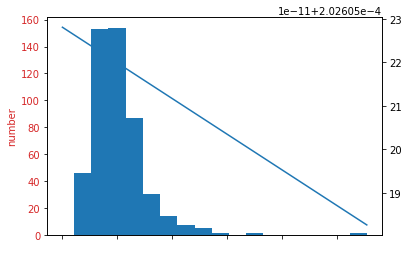

for class 1
Alpha and theata are: 4.787376867459726 0.0008174490149183603
mean with gamma is is: 0.00017075092217507296
mean with exp is: [0.00391344]


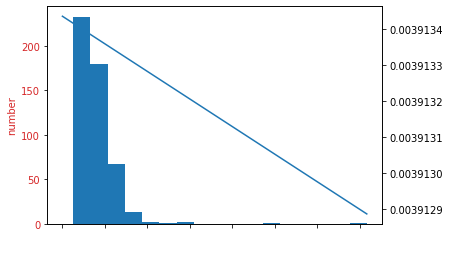

for class 2
Alpha and theata are: 17.44416475084367 0.0001837300486705509
mean with gamma is is: 1.0532464654787498e-05
mean with exp is: [0.00320502]


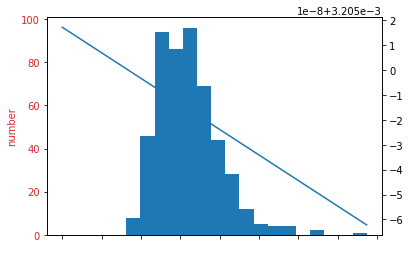

P scores less than 1/samples: 0



For gamma distribution the outcomes are:
for class 0


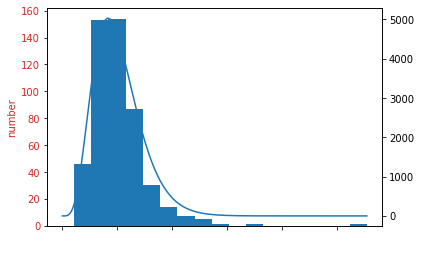

for class 1


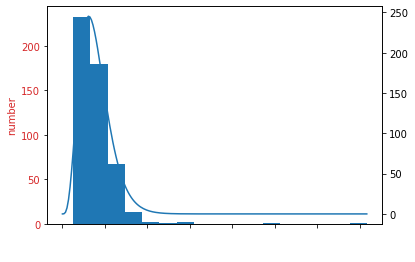

for class 2


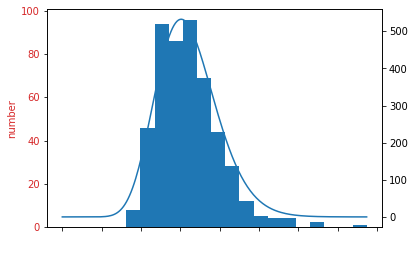

P scores less than 1/samples: 0





In [36]:
def scale(array):
    print(np.sum(array<0))
    print(np.sum(array[np.where(array != np.inf)]))
    return array/np.sum(array[np.where(array != np.inf)])


test_class.mle(model = "gamma",iterations = 15)
for graph in ["exp", "gamma"]:
    print("For", graph, "distribution the outcomes are:")
    total = 0
    for key in test_class.get_details():
        print('for class', key)
    #     print(len(test_class.get_details()[key][key]))
        fig, ax1 = plt.subplots(1, 1)
        points = test_class.get_details()[key][key]
        n, bins, patches = ax1.hist(points, bins = 17)
#         print([b for b in patches][-1].get_height())
        ax1.set_ylabel('number', color="tab:red")
        ax1.tick_params(axis='y', labelcolor="tab:red")
        ax1.set_xlabel("distance", color = "white")
        ax1.tick_params(axis = 'x', labelcolor = "white")
        x = np.linspace(0,bins[-1],200)
        if graph == "gamma":
            alpha, theta = test_class.gamma_alphas[key]
#             print(test_class.gamma_alphas[key])
    #         print(bins)
            rv = sp.stats.gamma(alpha ,scale = theta)
            pdf = rv.pdf(x)
        elif graph == "exp":
            alpha, theta = test_class.gamma_alphas[key]
            print("Alpha and theata are:", alpha, theta)
            print("mean with gamma is is:", theta/alpha)
            test_class.mle(model = "exp",iterations = 15)
            print("mean with exp is:", 1/test_class.lambdas[key])
            Lambda = 1/test_class.lambdas[key]
#             print("the lambda is:", Lambda)
            pdf = Lambda * np.exp(-Lambda * x)
    
        ax2 = ax1.twinx()
#         pdf = scale(pdf)
        ax2.plot(x, pdf)
    #     print('max of pdf is:', np.max(pdf))
        plt.show()
#         print("Lowest p-score is:", 1-rv.cdf(np.max(points)))
#         low_pscore = np.sum(1-rv.cdf(points) < 1/np.size(points))
#         print("Points with low p-scores:", low_pscore)
#         total += np.sum(1-rv.cdf(points) < 1/np.size(points))
    print("P scores less than 1/samples:", total)
    print()
    print()
    print()
# print(test_class.gamma_alphas)

In [ ]:
'''
Code under here is for uderstanding tools being used
'''

# b = sp.stats.gamma(.2,scale = .4)
# b.pdf(3)
# print("\n")

sp.stats.gamma(5.547742895875928 ,scale = 3.652029876893275*(10**-5)).cdf(0.00015718448850927371)

In [ ]:
fig, ax = plt.subplots(1, 1)

a = 5.547742895875928
x = np.linspace(sp.stats.gamma.ppf(0.01, a), sp.stats.gamma.ppf(0.99, a), 100)

ax.plot(x, sp.stats.gamma.pdf(x, a), 'r-', lw=5, alpha=0.6, label='gamma pdf')

rv = sp.stats.gamma(a ,3.652029876893275*(10**-5))
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

print(x)

In [140]:
def integral(x,a):
	return sp.integrate.quad(lambda y: y**(a - 1) * np.e**(-y) * np.log(y), 0, x)

x = np.asarray(x)

Refrences:
1. Thomas P. Minka Estimating a Gamma distribution. https://tminka.github.io/papers/minka-gamma.pdf